### Case Study #03
### Sreelekshmy S L
### NDSA_B4

Import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Read the data using pandas.

In [3]:
add_profit=pd.read_csv('Add_sales_data_2018.csv')

In [4]:
add_profit.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
add_profit.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There are no null values in the data set.

In [6]:
add_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


## 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

#### First check the correlation coefficient between each features in the data.

In [7]:
add_profit.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


#### Now present the correlation matrix using a heatmap to better understand it.

<AxesSubplot:>

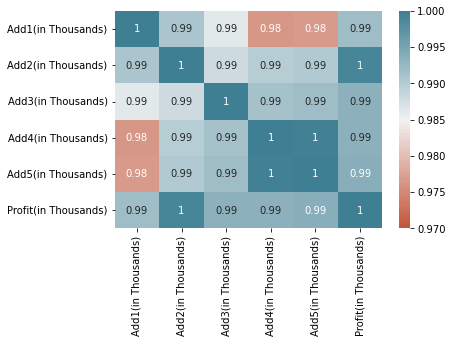

In [8]:
sns.heatmap(add_profit.corr(),annot=True,vmin=0.97,vmax=1,cmap=sns.diverging_palette(20, 220, n=200))

### From the heatmap it's clear that all the five Adds are highly positively correlated  to each other as well as the profit. <br>This shows that as amount spend on each of these add sales increases the profit also increases. Hence we can say that all these Adds are beneficiary for the company. <br>If we look closer we get the Add2 shows the highest correlation among all (nearest to 1). Hence if we are to choose one Add among the five which makes the company more profitable it would be Add2.

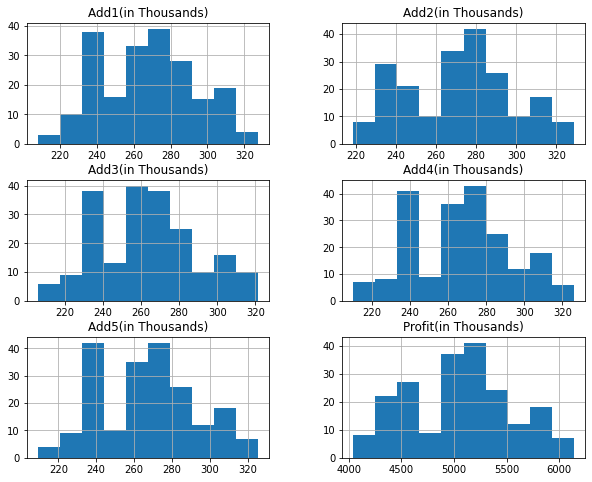

In [9]:
add_profit.drop(['Date'],axis=1).hist(figsize=(10,8))
plt.show()

The Adds and the profit are almost normally distributed

## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

#### Seperate out the dependent and independent variables. Here the profit is the dependent/target variable. Here we are not doing any feature reduction as there are only 4 attributes contributing and all of them are highly correlated to profit.

In [10]:
y=add_profit['Profit(in Thousands)']
X=add_profit.drop(['Profit(in Thousands)','Date'],axis=1)

#### Perform the train test splitting for the purpose of training certain amount of data and then testing the rest.

In [11]:
from sklearn.model_selection import train_test_split

#### Taking 25% of data as test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Create an instance for the linear model.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

#### Fit the training data to the model and then predict for the test set using the model.

In [15]:
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

#### Now manually compare a few predictions with original y value

In [16]:
y_test[:5]

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
Name: Profit(in Thousands), dtype: float64

In [17]:
predictions[:5]

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282])

It seems like the above values are same.

#### Now evaluate the model using a metric named mean_squared_error

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
print('MSE is: ',mean_squared_error(y_test,predictions))

MSE is:  3.181463894434722e-25


### Findings: <br> The linear model fits the dataset perfectly as we got a very small mean squared error. <br>This is mainly because all the four Add spendings are highly correlated to the Profit.<br> Hence if we input any set of add spending we will get the exact profit it is going to generate.

## 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement

#### Enter the values of the add sales in a list of list. And predict their profit using the model created.

In [21]:
X_obs = [[290,312,309,298,320]]
preds= lr.predict(X_obs)

In [22]:
preds

array([5820.06])

#### In case the values are not in correct order or have more than 1 value per feature make a dataframe of a dictionary containing the column name as key and their corresponding values.

In [24]:
X_ob= pd.DataFrame({'Add1(in Thousands)':[290],'Add2(in Thousands)':[312],'Add3(in Thousands)':[309],'Add4(in Thousands)':[298],'Add5(in Thousands)':[320]})
pred = lr.predict(X_ob)

In [25]:
print('The predicted Profit(in thousands) is:',np.round(pred[0],2))

The predicted Profit(in thousands) is: 5820.06


### Hence the predicted profit(in thousands) generated for the given set of add spendings is 5820.06

### End